## Creating networks from spatial data 3: K-Nearest Neighbours

In this tutorial we'll introduce K-Nearest Neighbour (KNN) networks and how they can be generate in MuSpAn for spatial analysis.

The KNN method of linking data is commonly used in areas of data science and bioinformatics. Specifically, it connects each node (data point) with it's k-nearest neighbours for a given distance metric (typically euclidean) which can we useful to find groups of similar data. For networks, this means drawing edges for all objects with their k-nearest objects, generating a KNN network. For more information about this network method, see this following [link](https://www.ibm.com/topics/knn). KNN networks have been previously used for cellular neighbourhood analysis where no cell boundary information is provided. But see our 'Neighbourhood Analysis' tutorial for more information on this. 

 As in our previous network tutorials, let's import the `Xenium-Healthy-Colon` example dataset to work on from our `datasets` module and add the Cell centroid using the `objects_to_points` on the Cell boundaries. We'll use this dataset as it contain both point-like and shape-like obejct types.

MuSpAn domain loaded successfully. Domain summary:
Domain name: Xenium-Healthy-Colon
Number of objects: 74174
Collections: ['Cell boundaries', 'Nucleus boundaries', 'Transcripts']
Labels: ['Cell ID', 'Transcript Counts', 'Cell Area', 'Cluster ID', 'Nucleus Area', 'Transcript', 'Transcript ID'] 
Networks: [] 
Distance matrices: []


(<Figure size 2700x2700 with 4 Axes>,
 <Axes: title={'center': 'Cell centroids'}>)

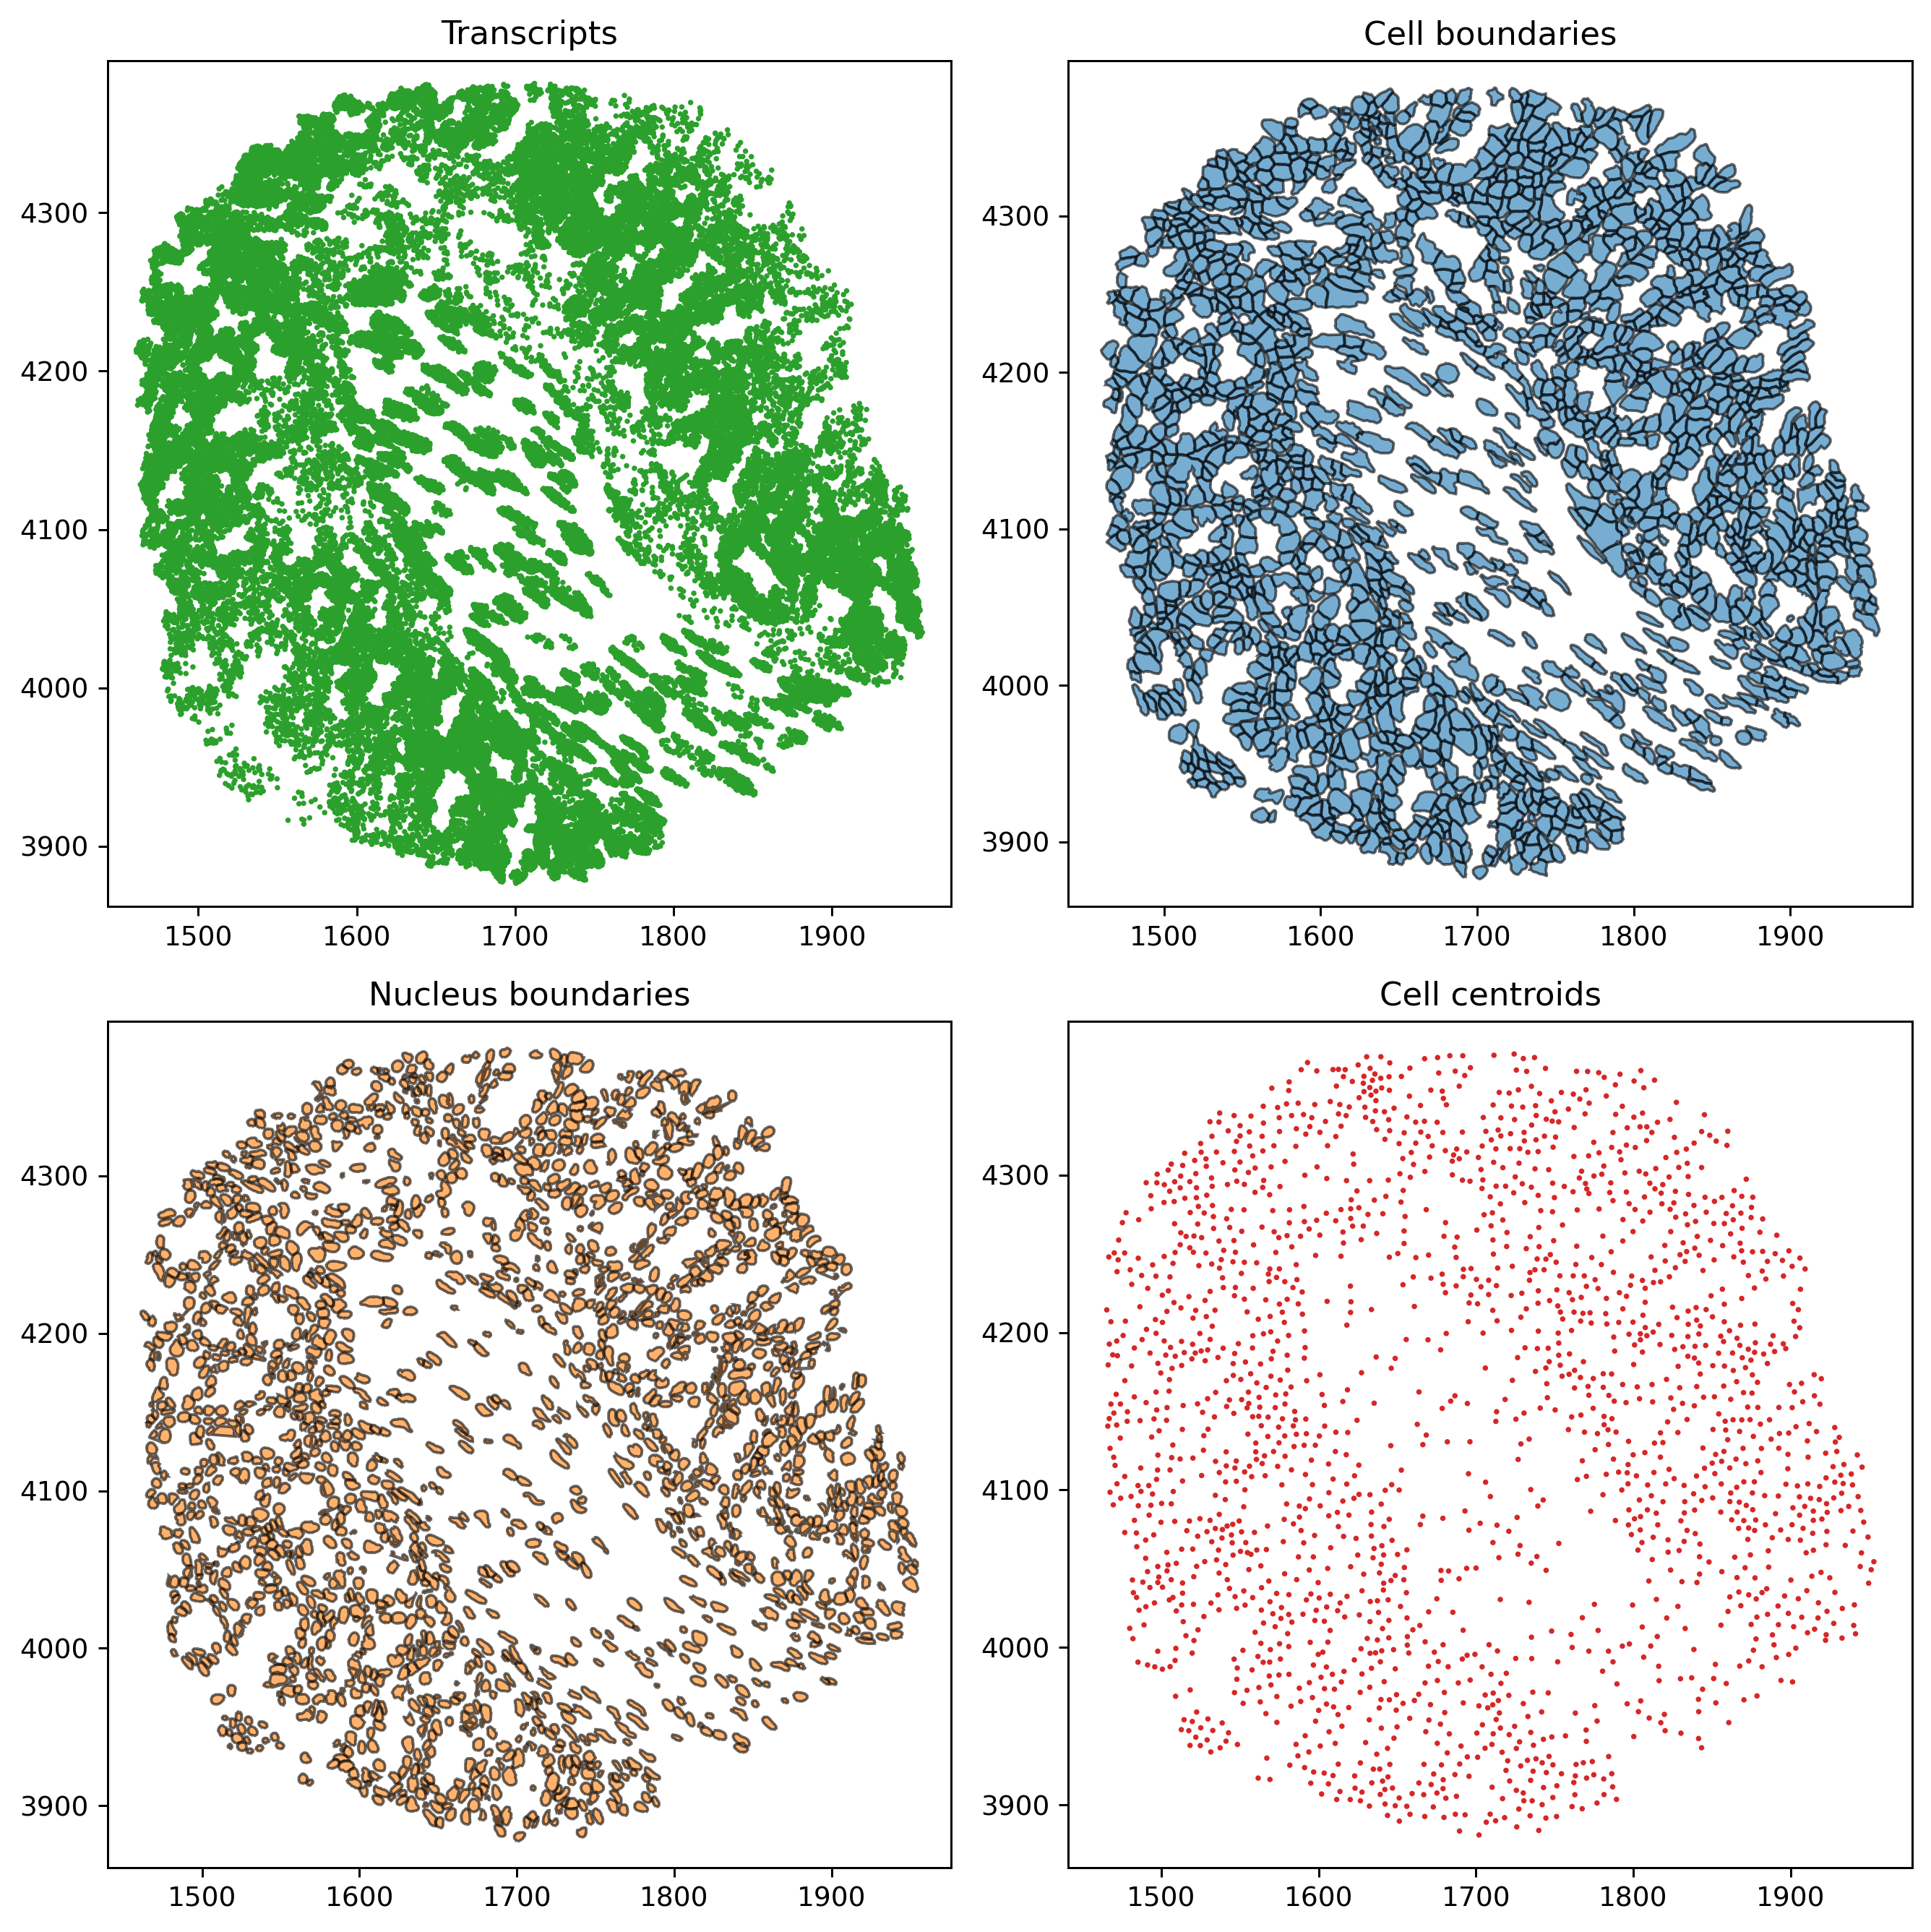

In [1]:
# Import necessary libraries
import muspan as ms
import matplotlib.pyplot as plt

# Set the resolution of the plots
plt.rcParams['figure.dpi'] = 270

# Load the example domain dataset
domain = ms.datasets.load_example_domain('Xenium-Healthy-Colon')

# Add cell centroids to the domain by converting cell boundaries to points
domain.convert_objects(
    population=('Collection', 'Cell boundaries'),
    object_type='point',
    conversion_method='centroids',
    collection_name='Cell centroids',
    inherit_collections=False
)

# Plot the collections in the domain
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Plot Transcripts
ax[0, 0].set_title('Transcripts')
ms.visualise.visualise(
    domain,
    ax=ax[0, 0],
    marker_size=1,
    objects_to_plot=('collection', 'Transcripts'),
    add_cbar=False
)

# Plot Cell boundaries
ax[0, 1].set_title('Cell boundaries')
ms.visualise.visualise(
    domain,
    ax=ax[0, 1],
    marker_size=1,
    objects_to_plot=('collection', 'Cell boundaries'),
    add_cbar=False
)

# Plot Nucleus boundaries
ax[1, 0].set_title('Nucleus boundaries')
ms.visualise.visualise(
    domain,
    ax=ax[1, 0],
    marker_size=1,
    objects_to_plot=('collection', 'Nucleus boundaries'),
    add_cbar=False
)

# Plot Cell centroids
ax[1, 1].set_title('Cell centroids')
ms.visualise.visualise(
    domain,
    ax=ax[1, 1],
    marker_size=1,
    objects_to_plot=('collection', 'Cell centroids'),
    add_cbar=False
)

We can build these networks in MuSpAn by passing in `KNN` as the network_method argument and defining the number of neighbours we'd like to connect for every node using the `number_of_nearest_neighbours` parameter. Let's make a KNN network on our 'Cell centroid' data, with k=10.

However, by definition of KNN, each neighbourhood is defined individually such that if node `i` is connected to node `j`, does not necessarily imply node `j` is connected to node `i`. This means our resultant network is directed. This is different to the Delaunay and Proximity networks as their edge relations are symmetric by definition, producing undirected networks. For more information, see this [link](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)). For us, this just means our KNN networks will be directed and will construct `networkX.DiGraph` objects.

In [2]:
# Generate a K-Nearest Neighbours (KNN) network on the 'Cell centroids' data with k=10
ms.networks.generate_network(
    domain,
    network_name='10-NN network',
    network_type='KNN',
    objects_as_nodes=('collection', 'Cell centroids'),
    number_of_nearest_neighbours=10
)

We can plot this network is the usual way:

(<Figure size 3780x2160 with 3 Axes>, <Axes: >)

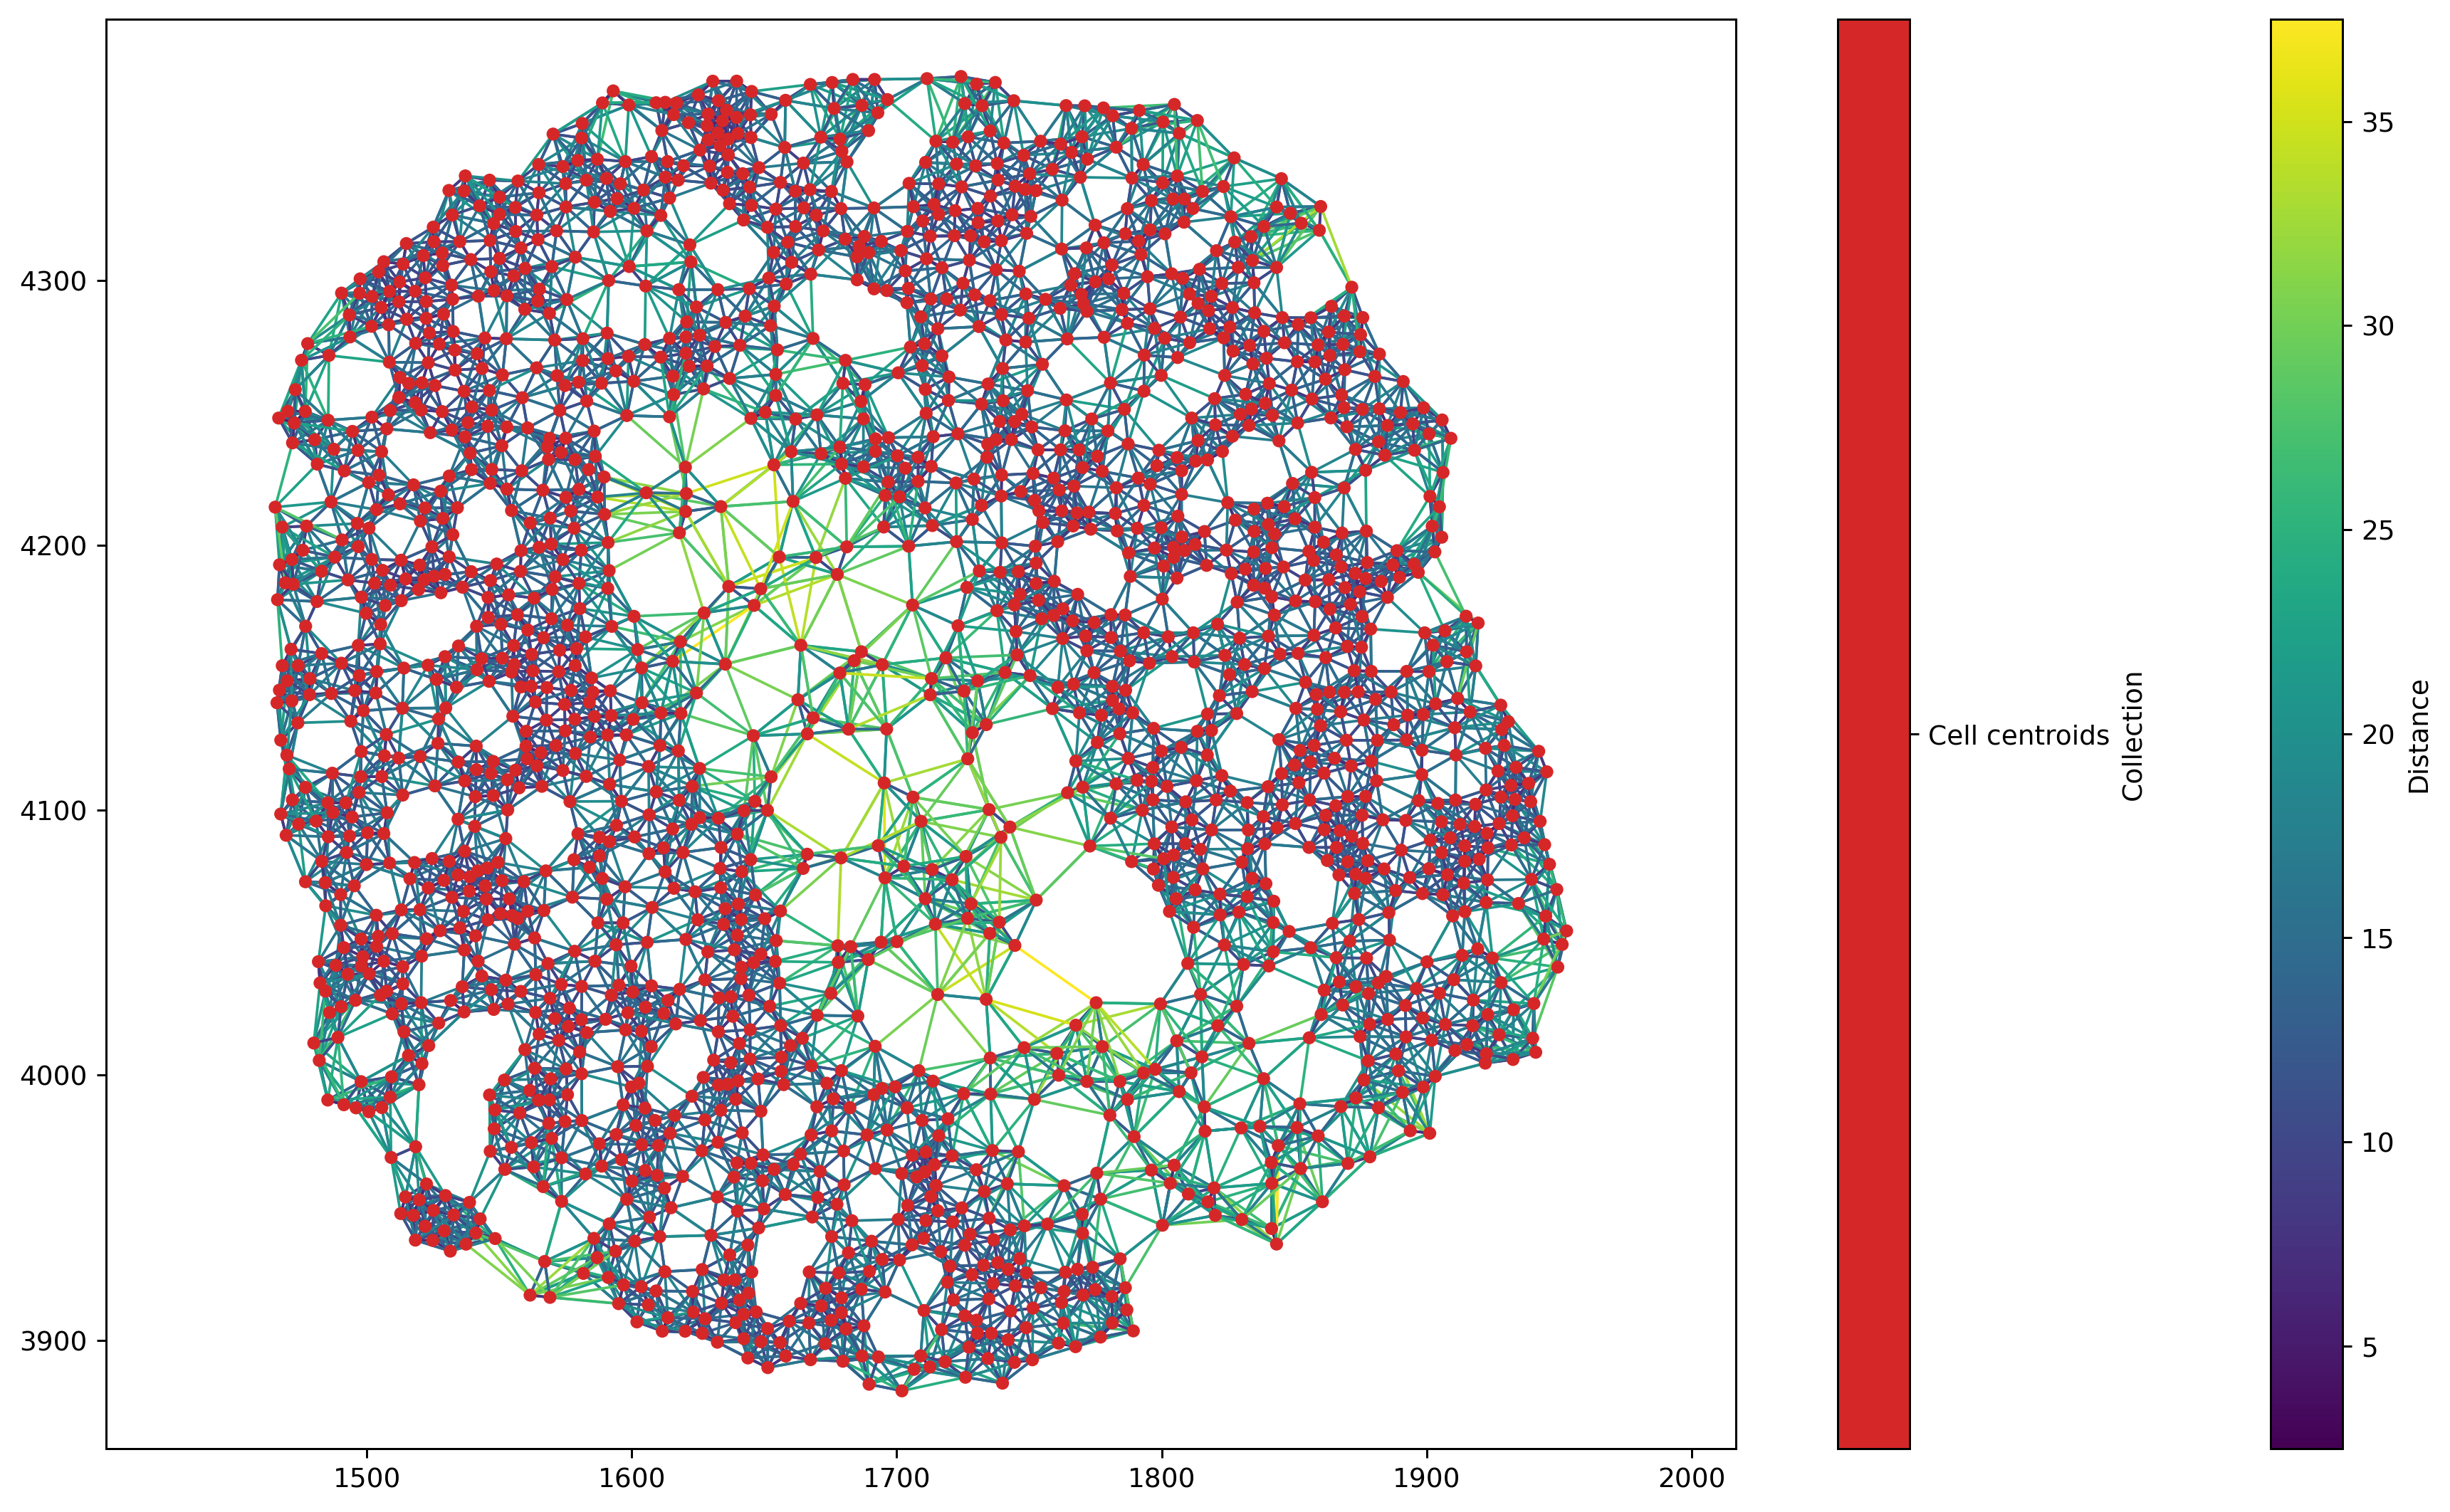

In [3]:
# Create a figure and axis for plotting the KNN network
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Visualise the 10-NN network on the 'Cell centroids' data
ms.visualise.visualise_network(
    domain,
    network_name='10-NN network',
    ax=ax,
    edge_weight_name='Distance',
    edge_cmap='viridis',
    visualise_kwargs=dict(
        objects_to_plot=('collection', 'Cell centroids'),
        marker_size=15
    )
)

We can see that each object should be connected to only 10 other objects in our domain.

In [4]:
# Initialize an empty list to store the number of neighbours for each node
number_of_neighbours_check = []

# Iterate through each node in the '10-NN network'
for node in domain.networks['10-NN network'].nodes():
    # Append the number of neighbours for the current node to the list
    number_of_neighbours_check.append(len(list(domain.networks['10-NN network'].neighbors(node))))

# Print the number of adjacent nodes for the first 100 nodes
print('Number of adjacent nodes for the first 100 nodes:', number_of_neighbours_check[:100])

Number of adjacent nodes for the first 100 nodes: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


Of course we can also filter any unwanted edges by their distance using the `max_edge_distance` and `min_edge_distance` parameters. But note this filtration will happen after the KNN network construction and therefore not providing the expected number of minimum neighbours.

To see how we might use these networks for spatial analysis, see our tutorials on 'Neighbourhood analysis' and 'Graph filtrations'.